<a href="https://colab.research.google.com/github/avnishpandey113/DataScienceProject/blob/master/MovieQualityPredictionUsingNaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Avnish Pandey**

**ID: 200394057**

**Email: akp817@uregina.ca**

In this activity, we will be developing a model based on the dataset we explored in assignment 3. 

In [0]:
#importing google drive using colab
from google.colab import drive

In [2]:
#Authorizing colab to access files in google drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
cd gdrive

/content/gdrive


In [4]:
cd My\ Drive

/content/gdrive/My Drive


In [5]:
#importing required python libraries to read and explore the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Model Selection**   
I followed the steps as described in the scikit learn algorithm to find the appropriate algorithm and model. Then I checked the conditions as per the diagram:  
1. Total number of samples in the data are more than 50? [Yes]  
Reason: Total 6820 entries.  
2. Predicting a category?[Yes]  
Reason: To determine whether a movie is poor/average/good/excellent.  
3. Have labeled data? [Yes]  
Reason:The data to be predicted is labelled as category.  
4. Less than 100K samples for labelled data? [Yes]  
Reason: Same as 1.  
5. Will Linear SVC work? [No]  
Reason: Works only for binary classifiers, and we have labelled text data with multiple values to classify. So it wont work.  
6. Is it text data? [Yes]  
Reason: Text data with label 'category'.  
Thus I reached at naive bayes classification model.  

Working of naive Bayes:
This algorithm works on the Bayes theorem. Given the factors, it calculates the probability of an event and classifies it into a particular category or gives it a label. The factors are independent of each other. Let's understand it by an example: Given An animal can be considered an elephant, if it has 4 legs, trunk and weighs over 100 kg. The legs, trunks and weight are features and label is an elephant. The features may be related to each other, but Naive Bayes considers all of these properties independently contribute to the category that an animal is an elephant.

In [0]:
#reading the csv dataset into dataframe
movieDB= pd.read_csv('movies.csv', encoding = "ISO-8859-1")

In [0]:
#Removing irrelevant features
movieDB.drop(['released','year', 'name'], axis = 1, inplace = True)

In [0]:
#replacing missing budget values with mean
new_budget = np.where(movieDB["budget"] == 0.0,
                      2.458113e+07,
                      movieDB["budget"])

In [0]:
movieDB["budget"] = new_budget

In [0]:
#adding category column to dataframe to classify movies based on score
movieDB['category']= np.nan

The movie lies is given a "Poor" for 0-4 score, "Average" for 4-6 score, "Good" for 6 to 8 score and "Best" for above 8 score.

In [0]:
movieDB.loc[(movieDB['score'] >= 0) & (movieDB['score'] <= 4 ), ['category']] = 'Poor'
movieDB.loc[(movieDB['score'] >4) & (movieDB['score'] <= 6 ), ['category']] = 'Average'
movieDB.loc[(movieDB['score'] > 6) & (movieDB['score'] <= 8 ), ['category']] = 'Good'
movieDB.loc[(movieDB['score'] >8) & (movieDB['score'] <= 10 ), ['category']] = 'Best'

In [12]:
movieDB_copy = movieDB.copy()
movieDB

,budget,company,country,director,genre,gross,rating,runtime,score,star,votes,writer,category
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,R,89,8.1,Wil Wheaton,299174,Stephen King,Best
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,PG-13,103,7.8,Matthew Broderick,264740,John Hughes,Good
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,PG,110,6.9,Tom Cruise,236909,Jim Cash,Good
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,R,137,8.4,Sigourney Weaver,540152,James Cameron,Best
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,PG,90,6.9,Joey Cramer,36636,Mark H. Baker,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,24581130.0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497.0,R,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,Average
6816,24581130.0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368.0,PG-13,90,4.9,Selma Blair,1959,Paige Cameron,Average
6817,3500000.0,Warner Bros. Animation,USA,Sam Liu,Animation,3775000.0,R,76,6.5,Kevin Conroy,36333,Brian Azzarello,Good
6818,24581130.0,Borderline Presents,USA,Nicolas Pesce,Drama,25981.0,R,76,6.2,Kika Magalhães,6947,Nicolas Pesce,Good


**Applying algorithm :**  
I am applying the Gaussian Naive Bayes algorithm to establish the model. As part of the application process, we need the features that will be used to predict the 'category' label of the movie in numbers. So using labelEncoder library, I encoded features with string values to numbers. Then I divided the dataset into 2 categories, namely features and outcome. Features consist of factors that will be used to predict the outcome, i.e. label 'category' of the movie. So we have 2 variables now, features and label. Now, these variables are divided into two sets, that is a training set and test set. The training set is used to train the model, and the test set is used to perform predictions. It will find the labels according to the 'features' variable in the test set. Then the result is compared to find the accuracy of the model, from what it predicted the value of the label against the actual label.

The following method was authored by Avinash Navlani(December,2018) for implementing gaussian naive bayes model.

In [0]:
# creating labelEncoder
le = preprocessing.LabelEncoder()
# converting string labels to numbers
category_encoded=le.fit_transform(movieDB['category'])
company_encoded=le.fit_transform(movieDB['company'])
director_encoded=le.fit_transform(movieDB['director'])
genre_encoded=le.fit_transform(movieDB['genre'])
rating_encoded=le.fit_transform(movieDB['rating'])
star_encoded=le.fit_transform(movieDB['star'])
writer_encoded=le.fit_transform(movieDB['writer'])
country_encoded=le.fit_transform(movieDB['country'])

In [0]:
movieDB_copy['company']=company_encoded
movieDB_copy['director']=director_encoded
movieDB_copy['star']=star_encoded
movieDB_copy['rating']=rating_encoded
movieDB_copy['genre']=genre_encoded
movieDB_copy['writer']=writer_encoded
movieDB_copy['country']=country_encoded
movieDB_copy['category']=category_encoded

In [15]:
movieDB_copy

,budget,company,country,director,genre,gross,rating,runtime,score,star,votes,writer,category
0,8000000.0,665,54,2192,1,52287414.0,8,89,8.1,2454,299174,3716,1
1,6000000.0,1680,54,1296,4,70136369.0,7,103,7.8,1605,264740,1970,2
2,15000000.0,1680,54,2645,0,179800601.0,6,110,6.9,2345,236909,1852,2
3,18500000.0,2062,54,1066,0,85160248.0,8,137,8.4,2192,540152,1629,1
4,9000000.0,2122,54,2123,1,18564613.0,6,90,6.9,1139,36636,2549,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,24581130.0,1013,53,1623,4,4750497.0,8,91,5.4,1066,9161,1800,0
6816,24581130.0,1914,54,1989,6,28368.0,7,90,4.9,2146,1959,3008,0
6817,3500000.0,2124,54,2313,2,3775000.0,8,76,6.5,1355,36333,450,2
6818,24581130.0,415,54,1914,6,25981.0,8,76,6.2,1370,6947,2946,2


In [0]:
features=list(zip(movieDB.runtime, director_encoded,rating_encoded,genre_encoded))
#features=list(zip(movieDB.runtime,movieDB.votes))
#features=list(zip(company_encoded,country_encoded,director_encoded,writer_encoded, star_encoded))

In [0]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, movieDB['category'], test_size=0.4)

In [0]:
#Create a Gaussian Classifier
GNB_Model = GaussianNB()

#Train the model using the training sets
GNB_Model.fit(X_train, y_train)

#Predict the response for test dataset
label_predicted = GNB_Model.predict(X_test)

In [19]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, label_predicted))

Accuracy: 0.6521260997067448


**Visualization:**  


In [0]:
#Removing irrelevant features from movieDB copy
movieDB_copy.drop(['budget','company', 'country','gross','score','star','votes','writer'], axis = 1, inplace = True)

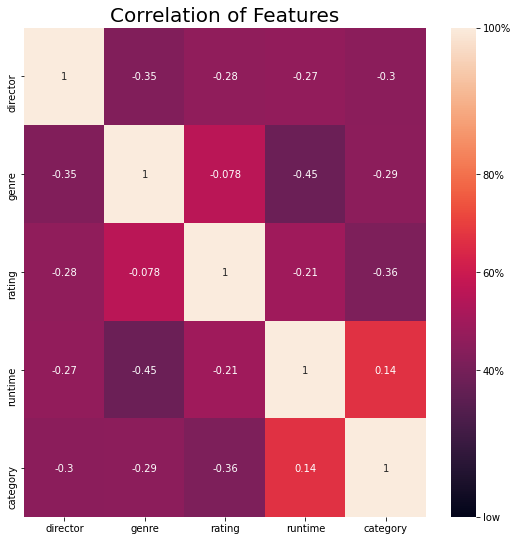

In [21]:
# Set the dimensions of the heatmap
plt.figure(figsize=(9,9))

# Set a title and plot the heatmap
plt.title('Correlation of Features', fontsize=20)
ax=sns.heatmap(movieDB_copy.corr().astype(float).corr(),vmin=-1.0,vmax=1.0, annot=True)
cbar = ax.collections[0].colorbar
cbar.set_ticks([-1.0, -0.4, 0.0, 0.4, 1.0])
cbar.set_ticklabels(['low', '40%', '60%', '80%','100%'])
plt.show()

This is a heatmap for variables category, runtime, rating, genre, director. The values represent how much the features are related to each other. Most of the values are actually negative, which represents that these features are highly independent of each other, thus not-correlated. This represents one of the properties of Gaussian Naive Bayes theorem, that the more the independent the feature values, the higher the accuracy. Hence these features were selected for prediction.

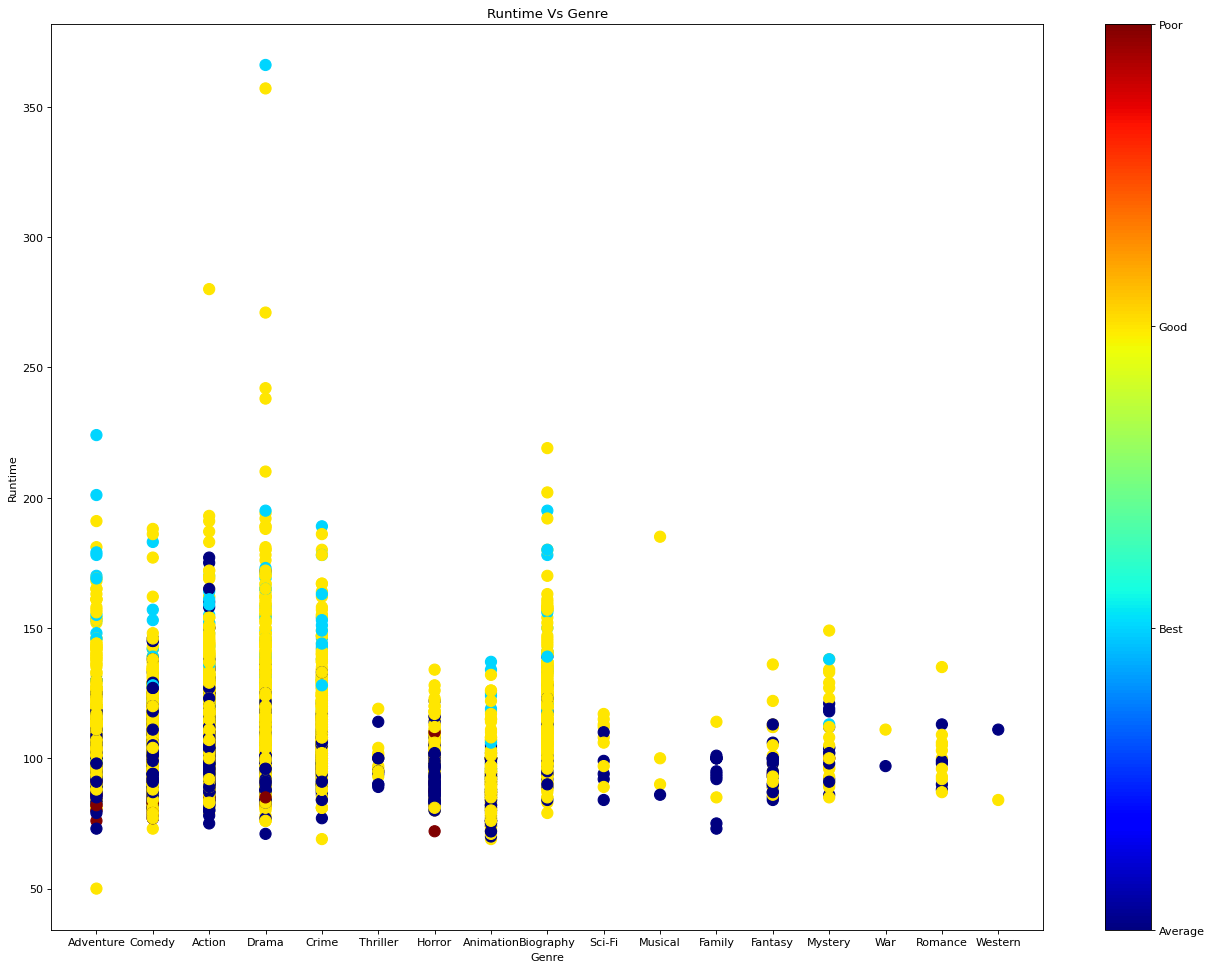

In [22]:
jet=plt.get_cmap('jet')
x = movieDB['genre']
y = movieDB['runtime']
z = movieDB_copy['category']
plt.figure(figsize=(20, 15),dpi=80)
plt.scatter(x, y, c=z, s=100,cmap=jet)
plt.title("Runtime Vs Genre")
plt.xlabel("Genre")
plt.ylabel("Runtime")
cbar=plt.colorbar()
cbar.set_ticks([0,1,2,3])
cbar.set_ticklabels(['Average','Best','Good','Poor'])
plt.show()

The above scatter plot represents Runtime, Genre and Category of the  movie. Category is represented by the color. From this we know that:
1. Most horror movies are average.
2. The shortest movie is of adventure genre and is good.
3. There are only 2 movies of western genre and of good and average category.
4. Drama has the longest running movies.
5. Most movies lying between ~75 to ~180 minutes, and are good.
6. No movies in genre sci fi/horror/Thriller/Fantasy/war movies are best.

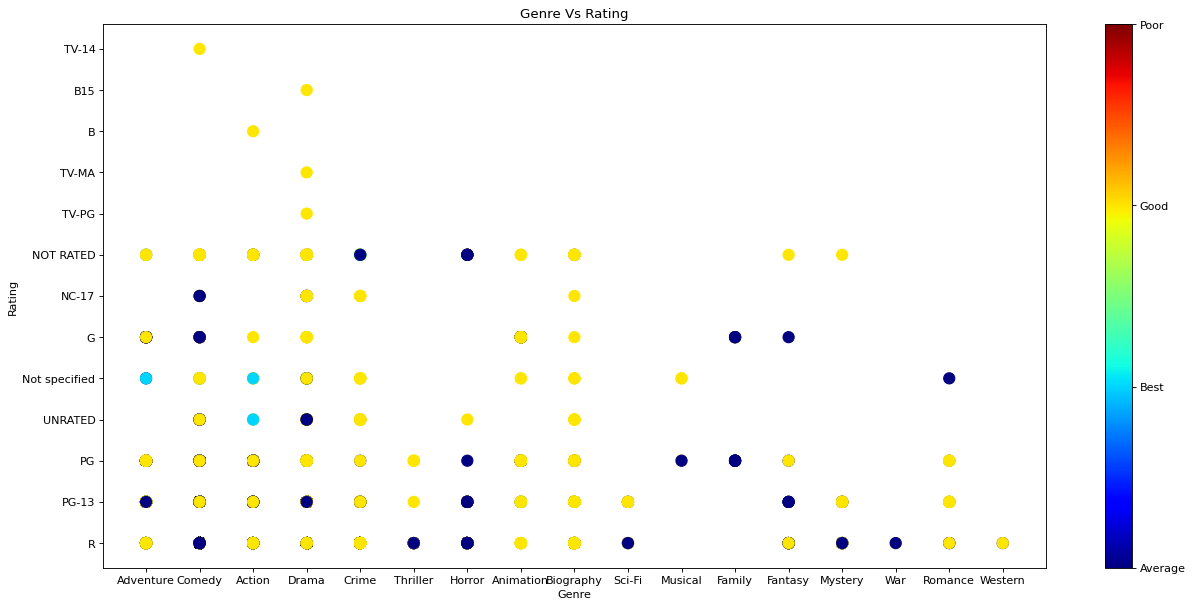

In [23]:
jet=plt.get_cmap('jet')
x = movieDB['genre']
y = movieDB['rating']
z = movieDB_copy['category']
plt.figure(figsize=(19,9),dpi=80)
plt.scatter(x, y, c=z, s=100,cmap=jet)
plt.title("Genre Vs Rating")
plt.xlabel("Genre")
plt.ylabel("Rating")
cbar=plt.colorbar()
cbar.set_ticks([0,1,2,3])
cbar.set_ticklabels(['Average','Best','Good','Poor'])
plt.show()

The above scatter plot represents Rating, Genre and Category of the movie. The category is represented by the colour.  
From this, we can conclude that:
1. Poor movies rating is missing.
2. Rating is hardly a factor influencing the category of a movie.
3. All the best movies that are visible in the above plot don't have a rating.

In [24]:
#FictionalInstance
label_predicted = GNB_Model.predict([[103, 1296, 7, 3]])
label_predicted

array(['Good'], dtype='<U7')

In [25]:
#FictionalInstanceInterploation
label_predicted1 = GNB_Model.predict([[10, 12, 1, 1]])
label_predicted1

array(['Best'], dtype='<U7')

In [26]:
#FictionalInstanceExtrapolation
label_predicted2 = GNB_Model.predict([[8000, 8000, 7000, 7000]])
label_predicted2

array(['Best'], dtype='<U7')

**Discussion**:
From the above results, it can be seen that this model can predict the outcome of future instances with about 65% accuracy. Thus, one cant rely on this model for accurate results. It works better when the features that are used to predict are independent. This model can't be used to predict dependence of features on one-another. Testing on fictional instance, resulted in a value of 2, which actually represents an "Average" movie, which can't be said for certain as the model only predicts with a 65% accuracy.  
For both fictional values given to model for interpolation and extrapolation, it is giving the output, though we can't say for certain how accurate it is. One will need a bigger data to verify the results.

**Summary:**  
As part of this notebook, I used the scikit-learn algorithm to determine the appropriate machine learning algorithm to be used on the dataset. Thus the Naive Bayes algorithm was chosen. Then data was modified so that it can be properly used by the algorithm. Finally, using the algorithm on the data, a model was produced that was able to predict the label from the features with 65% accuracy. Based on the model, visualizations were drawn. The visualizations proved that the lower the correlation between the features, the more the accuracy. Additional interesting information was found using visualizations. The goal was to use the data and model it using a machine learning algorithm and represent it using visualizations, which is achieved. Regression algorithms might have been interesting to perform on this data by predicting the score of the movie. There few new trends I was able to find out from visualizations, like one of the best-rated movie is actually 6 hours long.  

**References**  
Navlani, A. (2018). Available at: https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn